In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/pendulo_nn')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward, predict
from building_your_deep_neural_network_step_by_step_v8a import *



np.random.seed(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Dataset

You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [ ]:
training_data = np.loadtxt('/content/drive/My Drive/pendulo_nn/training_data.txt', dtype=float)
training_torques = np.loadtxt('/content/drive/My Drive/pendulo_nn/training_torques.txt', dtype=float)
training_torques = training_torques.reshape(1,-1)


The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

In [ ]:
# Example of a picture
print (training_data.shape)
print (training_torques.shape)

(2, 7568)
(1, 7568)


In [ ]:

# Standardize data to have feature values between 0 and 1.
#training_data[0] = training_data[0]/training_data[0].max()
#training_data[1] = training_data[1]/training_data[1].max()

training_data[0] = training_data[0]/10
training_data[1] = training_data[1]/10


#training_torques = training_torques/training_torques.max()



In [ ]:
print(training_data[0].max())
print(training_data[1].max())
print(training_torques.max())

0.4612389
0.7339173999999999
107.297656


In [ ]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 2     # num_px * num_px * 3
n_h = 1
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [ ]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_forward(A1, W2, b2)
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = -2*(Y - A2)
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_backward(dA2, cache2)
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 62.9457588359721
Cost after iteration 100: 62.937865561650746
Cost after iteration 200: 62.93701637969694
Cost after iteration 300: 62.93555968276033
Cost after iteration 400: 62.9311435827114
Cost after iteration 500: 62.917657677867815
Cost after iteration 600: 62.877186081551194
Cost after iteration 700: 62.761654910465936
Cost after iteration 800: 62.468608468909125
Cost after iteration 900: 61.867959868429004
Cost after iteration 1000: 60.94435848186347
Cost after iteration 1100: 59.866365634535185
Cost after iteration 1200: 58.85377192569869
Cost after iteration 1300: 57.9920400599233
Cost after iteration 1400: 57.214207656834965
Cost after iteration 1500: 56.42360900313355
Cost after iteration 1600: 55.516868213289925
Cost after iteration 1700: 54.42308650144413
Cost after iteration 1800: 53.09060419209138
Cost after iteration 1900: 51.36069939448507
Cost after iteration 2000: 49.441563886150256
Cost after iteration 2100: 47.31074788640071
Cost after iter

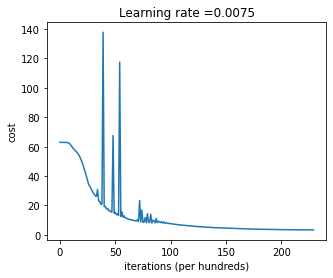

In [ ]:
parameters = two_layer_model(training_data, training_torques, layers_dims = (n_x, n_h, n_y), num_iterations = 23000, print_cost=True)

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [ ]:
np.savetxt('/content/drive/My Drive/pendulo_nn/W1.txt', parameters["W1"], fmt='%f')

In [ ]:
print(parameters["W2"].shape)

(1, 1)


In [ ]:
np.savetxt('/content/drive/My Drive/pendulo_nn/b1.txt', parameters["b1"] , fmt='%f')

In [ ]:
np.savetxt('/content/drive/My Drive/pendulo_nn/W2.txt', parameters["W2"] , fmt='%f')

In [ ]:
np.savetxt('/content/drive/My Drive/pendulo_nn/b2.txt', parameters["b2"] , fmt='%f')

In [ ]:
predictions_train = predict(training_data, training_torques, parameters)

Accuracy: 0.0
